## CHAPTER 8 - Dimensionality Reduction

In [1]:
import sys
import os

from datetime import datetime, timedelta

import pandas as pd
import numpy as np

import re
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_rows=500
pd.options.display.max_columns=500

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data[:,2:]
y = iris.target

In [3]:
X_centered = X - X.mean(axis=0)
U, s, Vt = np.linalg.svd(X_centered)
c1 = Vt.T[:, 0]
c2 = Vt.T[:, 1]

### X(d-proj) = XWd 
#### d - Projecting the trainning set down to d dimensions

In [4]:
W2 = Vt.T[:, :2]
X2D = X_centered.dot(W2)

In [5]:
Vt

array([[ 0.92177769,  0.38771882],
       [-0.38771882,  0.92177769]])

In [6]:
c1

array([0.92177769, 0.38771882])

In [7]:
W2

array([[ 0.92177769, -0.38771882],
       [ 0.38771882,  0.92177769]])

### With Scikit-learn

In [8]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
X2D = pca.fit_transform(X)

In [9]:
pca.explained_variance_ratio_

array([0.99025066, 0.00974934])

### How to compute the minimuim dimension preserving 95% of variance

In [10]:
pca = PCA()
pca.fit(X)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1 

In [11]:
d

1

### PCA for compression MNIST

In [12]:
from sklearn.datasets import load_digits

digits = load_digits()
print(digits.data.shape)

(1797, 64)


<Figure size 432x288 with 0 Axes>

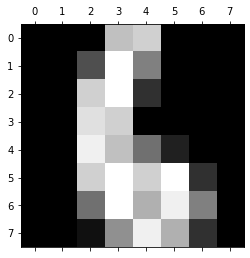

In [13]:
import matplotlib.pyplot as plt 

plt.gray() 
plt.matshow(digits.images[6]) 
plt.show() 

In [14]:
from sklearn.model_selection import train_test_split

X = digits.data
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=200, test_size=100)

In [16]:
pca = PCA(n_components = 54)
X_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)

### Incremental PCA

In [22]:
from sklearn.decomposition import IncrementalPCA

n_batches = 50

inc_pca = IncrementalPCA(n_components=4)

for X_batch in np.array_split(X_train, n_batches):
    inc_pca.partial_fit(X_batch)

C:\Users\d12669\AppData\Local\conda\conda\envs\deeplearnEnv\lib\site-packages\sklearn\decomposition\_incremental_pca.py:313: RuntimeWarning: Mean of empty slice.
  explained_variance[self.n_components_:].mean()
C:\Users\d12669\AppData\Local\conda\conda\envs\deeplearnEnv\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


### Kernel PCA

In [23]:
from sklearn.decomposition import KernelPCA

rbf_pca = KernelPCA(n_components = 2, kernel = "rbf", gamma=0.04)
X_reduced = rbf_pca.fit_transform(X)

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

clf = Pipeline([
            ("kpca", KernelPCA(n_components=2)),
            ("log_reg", LogisticRegression())
    
])

param_grid = [{
                "kpca__gamma" : np.linspace(0.03, 0.05, 10),
                "kpca__kernel" : ["rbf", "sigmoid"]
}]

grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(X, y)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kpca', KernelPCA(n_components=2)),
                                       ('log_reg', LogisticRegression())]),
             param_grid=[{'kpca__gamma': array([0.03      , 0.03222222, 0.03444444, 0.03666667, 0.03888889,
       0.04111111, 0.04333333, 0.04555556, 0.04777778, 0.05      ]),
                          'kpca__kernel': ['rbf', 'sigmoid']}])

In [35]:
print(grid_search.best_params_)

{'kpca__gamma': 0.03, 'kpca__kernel': 'rbf'}
